# Opravene veci

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.pipeline import Pipeline
import matplotlib
import statistics
import sklearn

from sklearn.pipeline import make_pipeline
from sklearn.base import TransformerMixin

train = pd.read_csv("17/train.csv", sep=',', header=None)
test = pd.read_csv("17/test.csv", sep=',', header=None)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

## Transformacie na trenovacej aj testovacej vzorke

In [2]:
train = train.rename(columns=train.iloc[0]).drop(train.index[0]) #zbavenie sa prveho riadku dat a premena na nazvy stlpcov
test = test.rename(columns=test.iloc[0]).drop(test.index[0])

In [3]:
import json

def medical_info_transform(x):
    lst = []
    for a in x:
        a = a.replace("'",'"')
        record = json.loads(a)
        lst.append(record)
    df = pd.DataFrame(lst)
    return df

train = pd.concat([train, medical_info_transform(train['medical_info'])], axis=1) #rozlozenie json medical_info
test = pd.concat([test, medical_info_transform(test['medical_info'])], axis=1) #rozlozenie json medical_info


Odstranime nepotrebne stlpce

In [4]:
train = train.iloc[1:]
train = train.drop(train.columns[[0]], axis=1)
del train['TBG']
del train['TBG measured']
del train['medical_info']
train[['class','class_id']] = train['class'].str.split('|',expand=True) # class triedu rozdelime na dve
train.head()

,age,sex,query on thyroxine,on antithyroid medication,thyroid surgery,I131 treatment,tumor,hypopituitary,TSH,T3 measured,T3,TT4 measured,TT4,T4U,FTI measured,FTI,referral source,class,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,date_of_birth,T4U measured,TSH measured,goitre,lithium,on thyroxine,pregnant,psych,query hyperthyroid,query hypothyroid,sick,class_id
1,53.0,M,f,f,f,f,f,f,0.3,t,1.2,t,105.0,0.91,t,115,SVHC,negative.,Private,90021,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,0,0,40,?,1965-01-22,t,t,f,f,f,f,f,f,f,f,232
2,73.0,M,f,f,f,f,f,f,2.1,t,1.9,t,118.0,0.9,t,131,SVI,negative.,Private,97411,7th-8th,4,Never-married,Machine-op-inspct,Not-in-family,Asian-Pac-Islander,0,0,45,Laos,1944-04-01,t,t,f,f,f,f,f,f,f,t,3255
3,73.0,F,f,f,f,f,f,f,1.6,t,2.0,t,105.0,1.17,t,89,SVI,negative.,Local-gov,89491,Masters,14,Divorced,Exec-managerial,Not_in_family,White,0,0,40,United-States,45-03-12,t,t,f,f,f,f,f,f,f,f,322
4,24.0,M,f,f,f,f,f,f,1.3,t,1.7,t,106.0,1.0,t,106,SVHC,negative.,Private,279636,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,0,0,50,Guatemala,1993-12-26,t,t,f,f,F,f,f,f,f,f,2462
5,25.0,F,f,f,f,f,f,f,468.0,t,0.7,t,21.0,1.1,t,19,other,negative.,Private,172577,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,0,0,44,United-States,1992-08-27,t,t,f,f,F,f,f,f,f,f,3047


In [5]:
test = test.iloc[1:]
test = test.drop(test.columns[[0]], axis=1)
del test['TBG']
del test['TBG measured']
del test['medical_info']
test[['class','class_id']] = test['class'].str.split('|',expand=True) # class triedu rozdelime na dve
test.head()

,age,sex,query on thyroxine,on antithyroid medication,thyroid surgery,I131 treatment,tumor,hypopituitary,TSH,T3 measured,T3,TT4 measured,TT4,T4U,FTI measured,FTI,referral source,class,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,date_of_birth,T4U measured,TSH measured,goitre,lithium,on thyroxine,pregnant,psych,query hyperthyroid,query hypothyroid,sick,class_id
1,24,M,f,f,f,f,f,f,3.3,t,1.2,t,70.0,0.87,t,80,SVI,negative.,Private,143766,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,0,0,40,United-States,1993/08/27,t,t,f,f,f,f,f,f,f,f,177
2,69,F,f,f,f,f,f,f,1.1,t,1.9,t,135.0,0.96,t,141,SVI,negative.,Private,57637,HS-grad,9,Divorced,Other-service,Not_in_family,White,0,0,32,United-States,1949-03-07 00 00 00,t,t,f,f,f,f,f,f,f,f,3191
3,37,M,f,f,f,f,f,f,2.6,t,2.3,t,68.0,0.94,t,72,other,negative.,Private,244268,11th,7,Married-civ-spouse,Craft-repair,Husband,White,0,1672,48,United-States,1980-09-12,t,t,f,f,f,f,f,f,f,f,3013
4,46,M,f,f,f,f,f,f,0.25,t,2.0,t,112.0,1.01,t,111,SVI,negative.,Private,606347,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Black,0,0,40,United-States,15/07/1971,t,t,f,f,f,f,f,f,f,f,701
5,29,F,f,f,f,f,f,f,1.6,t,2.6,t,89.0,0.98,t,91,other,negative.,Self-emp-inc,342510,Bachelors,13,Married-civ-spouse,Farming-fishing,Wife,White,0,0,60,United-States,1988-08-17,f,t,f,f,f,f,f,f,f,f,541


**Oprava AGE**

In [6]:
def oprav_age(a):
    a = float(a)    
    a = abs(a)
    a = a%100
    
    if np.isnan(a):
        a = 1000
    
    a = int(a)
    return a

In [7]:
def vymaz_riadok_kde_nie_je_vek(df,column):
    for i,a in df[column].iteritems():
        if a == 1000:
            df = df[df[column]!=1000]
    return df
            

In [8]:
train['age'] = train['age'].map(lambda x: oprav_age(x))
test['age'] = test['age'].map(lambda x: oprav_age(x))

In [9]:
train = vymaz_riadok_kde_nie_je_vek(train,'age') #rozhodli sme sa data s chybajucim vekom odstranit
test = vymaz_riadok_kde_nie_je_vek(test,'age') #rozhodli sme sa data s chybajucim vekom odstranit

**Oprava kategorickych hodnot**

In [10]:
class Transform(TransformerMixin):
    def __init__(self, column, source, target):
        self.column = column
        self.source = source
        self.target = target
        
    def fit(self, df, y=None, **fit_params):
        return self
    
    def transform(self, df, **transform_params):
        sample = df[self.column] == self.source
        df.loc[sample, self.column] = self.target
        return df

Oprava **referral source**

In [11]:
ppl = Pipeline([
              ('name1', Transform('referral source', 'SVHC', 'svhc')),
              ('name2', Transform('referral source', 'SVI', 'svi')),
              ('name3', Transform('referral source', 'Other', 'other')),
              ('name4', Transform('referral source', 'sVHC', 'svhc')),
              ('name5', Transform('referral source', 'sVI', 'svi')),
              ('name6', Transform('referral source', 'STMW', 'stmw')),
              ('name7', Transform('referral source', 'SVHD', 'svhd')),
              ('name8', Transform('referral source', 'sTMW', 'stmw')),
              ('name9', Transform('referral source', 'sVHD', 'svhd')),
      ])

model = ppl.fit(train)
train = model.transform(train)
test = model.transform(test)

Oprava **relationship** - odstranenie zaciatocnych bielych znakov a zjednotenie hodnot

In [12]:
def strip(x):
    return x.strip()

train['relationship'] = train['relationship'].map(lambda x: strip(x))
test['relationship'] = test['relationship'].map(lambda x: strip(x))

line = Pipeline([
              ('r1', Transform('relationship', 'Not_in_family', 'Not-in-family')),
              ('r2', Transform('relationship', 'Own_child', 'Own-child')),
              ('r3', Transform('relationship', 'Other_relative', 'Other-relative')),
      ])

model = line.fit(train)
train = model.transform(train)
test = model.transform(test)


Oprava **workclass** - odstranenie zaciatocnych bielych znakov

In [13]:
train['workclass'] = train['workclass'].map(lambda x: strip(x))
test['workclass'] = test['workclass'].map(lambda x: strip(x))

Oprava **race** - odstranenie zaciatocnych bielych znakov

In [14]:
train['race'] = train['race'].map(lambda x: strip(x))
test['race'] = test['race'].map(lambda x: strip(x))


Oprava **native country** - odstranenie zaciatocnych bielych znakov

In [15]:
train['native-country'] = train['native-country'].map(lambda x: strip(x))
test['native-country'] = test['native-country'].map(lambda x: strip(x))

Oprava **date of birth** - zjednotenie formatov datumov

In [16]:
from datetime import date
import datetime

def guess_date(string):
    for fmt in ["%Y/%m/%d", "%Y%m%d", "%y-%m-%d", "%Y-%m-%d", "%Y-%m-%d %H:%M:%S", "%Y-%m-%d %H %M %S", "%d/%m/%Y"]:
        try:
            return datetime.datetime.strptime(string, fmt).date()
        except ValueError:
            continue
    raise ValueError(string)
    
def string_is_nan(x):
    if str(x) != 'nan':
        return True
    else:
        return False
    

In [17]:
train['date_of_birth'] = train['date_of_birth'].map(lambda x: guess_date(str(x)) if string_is_nan(x) else x)
test['date_of_birth'] = test['date_of_birth'].map(lambda x: guess_date(str(x)) if string_is_nan(x) else x)
    

Oprava **on thyroxine** - zjednotenie formatov

In [18]:
line = Pipeline([
              ('ot1', Transform('on thyroxine', 'F', 'f')),
              ('ot2', Transform('on thyroxine', 'T', 't')),
              ('ot3', Transform('on thyroxine', 'FALSE', 'f')),
              ('ot4', Transform('on thyroxine', 'TRUE', 't')),
      ])

model = line.fit(train)
train = model.transform(train)
test = model.transform(test)

## Chybajuce a vychylene hodnoty

Transformacia numerickych hodnot pri TSH, TT4, T4U, FTI a T3 na float. Predtym nez pouzijeme mapovaciu funkciu, musime doplnit chybajuce data

In [19]:
def check_if_number(inputString):
    return any(char.replace('.','',1).isdigit() for char in str(inputString))

def map_to_float(x):
    if(check_if_number(x)):
        return float(x)
    elif(x=='?'):
        return float('NaN')

**TSH**

In [20]:
def normalization(data, shift, scale): 
    return (np.array(data) - float(shift))/scale

In [21]:
train['TSH'] = train['TSH'].map(lambda x: map_to_float(x))
test['TSH'] = test['TSH'].map(lambda x: map_to_float(x))

In [22]:
import statistics
median_train = statistics.median(train['TSH'].value_counts())
median_test = statistics.median(test['TSH'].value_counts())
train['TSH'] = train['TSH'].fillna(median_train)
test['TSH'] = test['TSH'].fillna(median_train)

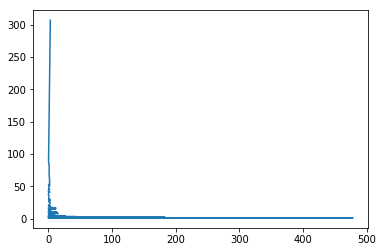

In [23]:
train['TSH'].value_counts().plot(kind='line')

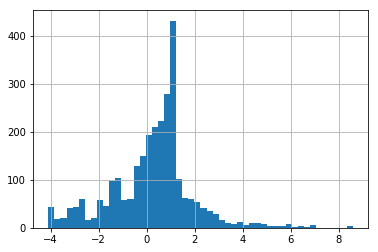

In [24]:
from scipy.stats import boxcox
transformed, att = boxcox(train['TSH'])
pom = pd.Series(transformed).hist(bins=50)

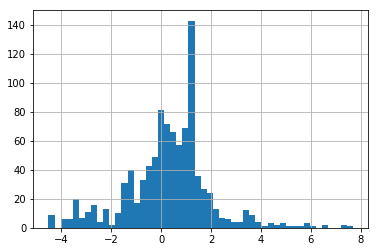

In [25]:
from scipy.stats import boxcox
transformed, att = boxcox(test['TSH'])
pom = pd.Series(transformed).hist(bins=50)

Normalizacia TSH

Text(0.5,1,'throughput (Z-normalization)')

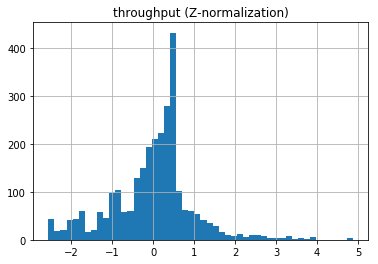

In [26]:
from scipy.stats import boxcox
transformed, att = boxcox(train['TSH'])

z_transformed = normalization(transformed, np.mean(transformed), np.std(transformed))
pom = pd.Series(z_transformed).hist(bins=50)
pom.set_title('throughput (Z-normalization)')

Text(0.5,1,'throughput (Z-normalization)')

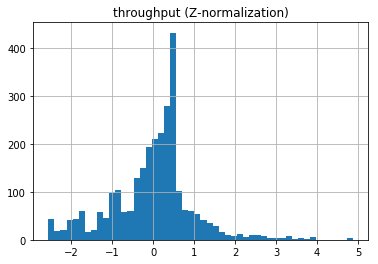

In [27]:
from sklearn import preprocessing

preprocessing.scale(transformed)
pom = pd.Series(z_transformed).hist(bins=50)
pom.set_title('throughput (Z-normalization)')

In [28]:
TSH_mean = np.mean(transformed)
TSH_std = np.std(transformed)

Pouzitie na testovacich datach

Text(0.5,1,'throughput (Z-normalization)')

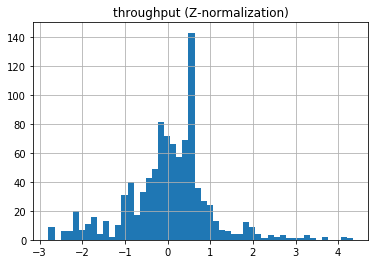

In [29]:
from scipy.stats import boxcox
transformed, att = boxcox(test['TSH'])

z_transformed = normalization(transformed, TSH_mean, TSH_std)
pom = pd.Series(z_transformed).hist(bins=50)
pom.set_title('throughput (Z-normalization)')

**TT4**

In [30]:
train['TT4'] = train['TT4'].map(lambda x: map_to_float(x))
test['TT4'] = test['TT4'].map(lambda x: map_to_float(x))

In [31]:
from fancyimpute import KNN 
train['TT4'] = KNN(k=10).complete(train['TT4'].reshape(-1,1))
test['TT4'] = KNN(k=10).complete(test['TT4'].reshape(-1,1))

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


Imputing row 1/2799 with 0 missing, elapsed time: 0.946
Imputing row 101/2799 with 0 missing, elapsed time: 0.946
Imputing row 201/2799 with 0 missing, elapsed time: 0.947
Imputing row 301/2799 with 0 missing, elapsed time: 0.947
Imputing row 401/2799 with 1 missing, elapsed time: 0.947
Imputing row 501/2799 with 0 missing, elapsed time: 0.948
Imputing row 601/2799 with 0 missing, elapsed time: 0.948
Imputing row 701/2799 with 0 missing, elapsed time: 0.948
Imputing row 801/2799 with 0 missing, elapsed time: 0.948
Imputing row 901/2799 with 0 missing, elapsed time: 0.949
Imputing row 1001/2799 with 0 missing, elapsed time: 0.949
Imputing row 1101/2799 with 0 missing, elapsed time: 0.949
Imputing row 1201/2799 with 0 missing, elapsed time: 0.950
Imputing row 1301/2799 with 0 missing, elapsed time: 0.950
Imputing row 1401/2799 with 0 missing, elapsed time: 0.950
Imputing row 1501/2799 with 0 missing, elapsed time: 0.950
Imputing row 1601/2799 with 0 missing, elapsed time: 0.951
Imputing 

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [32]:
train['TT4'] = train['TT4'].ravel()
test['TT4'] = test['TT4'].ravel()

In [33]:
train['TT4'] = pd.Series(train['TT4'])
test['TT4'] = pd.Series(test['TT4'])

In [34]:
train['TT4'] = train['TT4'].map(lambda x: train['TT4'].mean() if x == 0.0 else x)
test['TT4'] = test['TT4'].map(lambda x: test['TT4'].mean() if x == 0.0 else x)

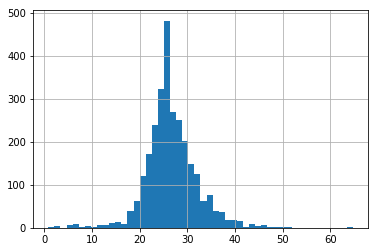

In [35]:
from scipy.stats import boxcox
transformed, att = boxcox(train['TT4'])
pom = pd.Series(transformed).hist(bins=50)

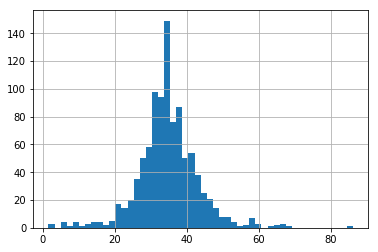

In [36]:
from scipy.stats import boxcox
transformed, att = boxcox(test['TT4'])
pom = pd.Series(transformed).hist(bins=50)

Normalizacia TT4

Text(0.5,1,'throughput (Z-normalization)')

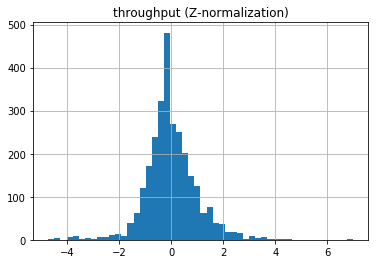

In [37]:
from scipy.stats import boxcox
transformed, att = boxcox(train['TT4'])

z_transformed = normalization(transformed, np.mean(transformed), np.std(transformed))
pom = pd.Series(z_transformed).hist(bins=50)
pom.set_title('throughput (Z-normalization)')

In [38]:
TT4_mean = np.mean(transformed)
TT4_std = np.std(transformed)

Text(0.5,1,'throughput (Z-normalization)')

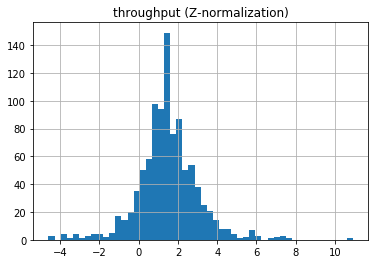

In [39]:
from scipy.stats import boxcox
transformed, att = boxcox(test['TT4'])

z_transformed = normalization(transformed, TT4_mean, TT4_std)
pom = pd.Series(z_transformed).hist(bins=50)
pom.set_title('throughput (Z-normalization)')

**FTI**

In [40]:
train['FTI'] = train['FTI'].map(lambda x: map_to_float(x))
test['FTI'] = test['FTI'].map(lambda x: map_to_float(x))

In [41]:
from fancyimpute import KNN 
train['FTI'] = KNN(k=10).complete(train['FTI'].reshape(-1,1))
test['FTI'] = KNN(k=10).complete(test['FTI'].reshape(-1,1))

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


Imputing row 1/2799 with 0 missing, elapsed time: 0.829
Imputing row 101/2799 with 0 missing, elapsed time: 0.830
Imputing row 201/2799 with 0 missing, elapsed time: 0.830
Imputing row 301/2799 with 0 missing, elapsed time: 0.831
Imputing row 401/2799 with 1 missing, elapsed time: 0.831
Imputing row 501/2799 with 0 missing, elapsed time: 0.832
Imputing row 601/2799 with 0 missing, elapsed time: 0.832
Imputing row 701/2799 with 0 missing, elapsed time: 0.832
Imputing row 801/2799 with 0 missing, elapsed time: 0.833
Imputing row 901/2799 with 0 missing, elapsed time: 0.833
Imputing row 1001/2799 with 0 missing, elapsed time: 0.833
Imputing row 1101/2799 with 0 missing, elapsed time: 0.834
Imputing row 1201/2799 with 0 missing, elapsed time: 0.834
Imputing row 1301/2799 with 0 missing, elapsed time: 0.834
Imputing row 1401/2799 with 0 missing, elapsed time: 0.835
Imputing row 1501/2799 with 0 missing, elapsed time: 0.835
Imputing row 1601/2799 with 0 missing, elapsed time: 0.835
Imputing 

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [42]:
train['FTI'] = train['FTI'].ravel()
test['FTI'] = test['FTI'].ravel()
train['FTI'] = pd.Series(train['FTI'])
test['FTI'] = pd.Series(test['FTI'])

In [43]:
train['FTI'] = train['FTI'].map(lambda x: train['FTI'].mean() if x == 0.0 else x)
test['FTI'] = test['FTI'].map(lambda x: test['FTI'].mean() if x == 0.0 else x)

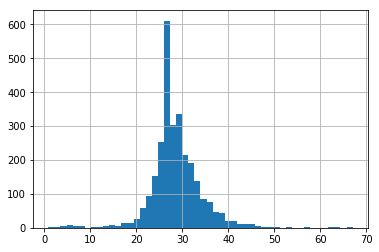

In [44]:
from scipy.stats import boxcox
transformed, att = boxcox(train['FTI'])
pom = pd.Series(transformed).hist(bins=50)

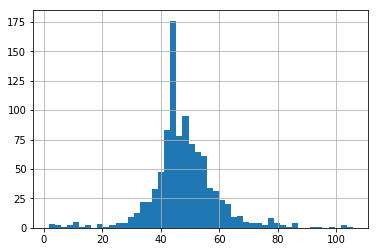

In [45]:
from scipy.stats import boxcox
transformed, att = boxcox(test['FTI'])
pom = pd.Series(transformed).hist(bins=50)

Normalizacia FTI

Text(0.5,1,'throughput (Z-normalization)')

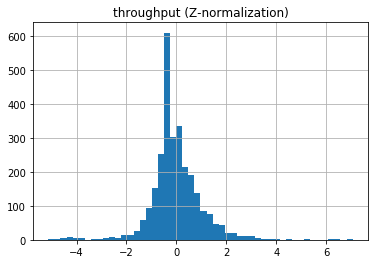

In [46]:
from scipy.stats import boxcox
transformed, att = boxcox(train['FTI'])

z_transformed = normalization(transformed, np.mean(transformed), np.std(transformed))
pom = pd.Series(z_transformed).hist(bins=50)
pom.set_title('throughput (Z-normalization)')

Text(0.5,1,'throughput (Z-normalization)')

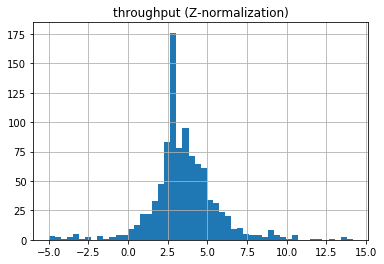

In [47]:
FTI_mean = np.mean(transformed)
FTI_std = np.std(transformed)

from scipy.stats import boxcox
transformed, att = boxcox(test['FTI'])

z_transformed = normalization(transformed, FTI_mean, FTI_std)
pom = pd.Series(z_transformed).hist(bins=50)
pom.set_title('throughput (Z-normalization)')

**T4U**

In [48]:
train['T4U'] = train['T4U'].map(lambda x: map_to_float(x))
test['T4U'] = test['T4U'].map(lambda x: map_to_float(x))

from fancyimpute import KNN 
train['T4U'] = KNN(k=10).complete(train['T4U'].reshape(-1,1))
test['T4U'] = KNN(k=10).complete(test['T4U'].reshape(-1,1))

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


Imputing row 1/2799 with 0 missing, elapsed time: 0.959
Imputing row 101/2799 with 0 missing, elapsed time: 0.960
Imputing row 201/2799 with 0 missing, elapsed time: 0.960
Imputing row 301/2799 with 0 missing, elapsed time: 0.961
Imputing row 401/2799 with 1 missing, elapsed time: 0.961
Imputing row 501/2799 with 0 missing, elapsed time: 0.961
Imputing row 601/2799 with 0 missing, elapsed time: 0.962
Imputing row 701/2799 with 0 missing, elapsed time: 0.962
Imputing row 801/2799 with 0 missing, elapsed time: 0.962
Imputing row 901/2799 with 0 missing, elapsed time: 0.963
Imputing row 1001/2799 with 0 missing, elapsed time: 0.963
Imputing row 1101/2799 with 0 missing, elapsed time: 0.963
Imputing row 1201/2799 with 0 missing, elapsed time: 0.964
Imputing row 1301/2799 with 0 missing, elapsed time: 0.964
Imputing row 1401/2799 with 0 missing, elapsed time: 0.964
Imputing row 1501/2799 with 0 missing, elapsed time: 0.965
Imputing row 1601/2799 with 0 missing, elapsed time: 0.965
Imputing 

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [49]:
train['T4U'] = train['T4U'].ravel()
test['T4U'] = test['T4U'].ravel()
train['T4U'] = pd.Series(train['T4U'])
test['T4U'] = pd.Series(test['T4U'])

train['T4U'] = train['T4U'].map(lambda x: train['T4U'].mean() if x == 0.0 else x)
test['T4U'] = test['T4U'].map(lambda x: test['T4U'].mean() if x == 0.0 else x)

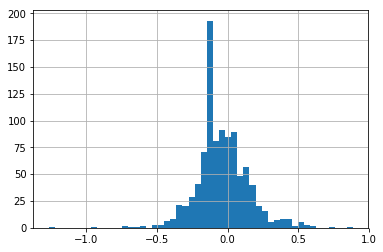

In [50]:
from scipy.stats import boxcox
transformed, att = boxcox(test['T4U'])
pom = pd.Series(transformed).hist(bins=50)

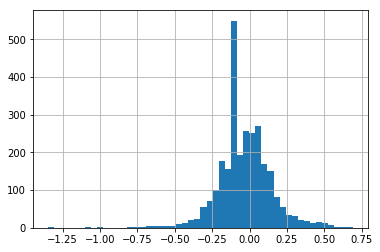

In [51]:
from scipy.stats import boxcox
transformed, att = boxcox(train['T4U'])
pom = pd.Series(transformed).hist(bins=50)

Normalizacia T4U

Text(0.5,1,'throughput (Z-normalization)')

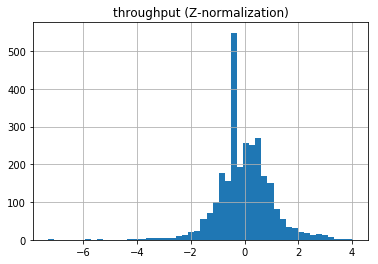

In [52]:
from scipy.stats import boxcox
transformed, att = boxcox(train['T4U'])

z_transformed = normalization(transformed, np.mean(transformed), np.std(transformed))
pom = pd.Series(z_transformed).hist(bins=50)
pom.set_title('throughput (Z-normalization)')

Text(0.5,1,'throughput (Z-normalization)')

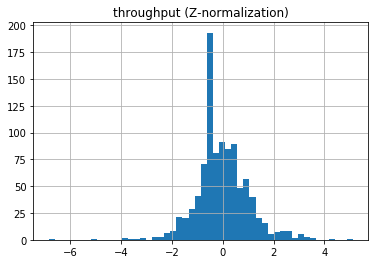

In [53]:
T4U_mean = np.mean(transformed)
T4U_std = np.std(transformed)

from scipy.stats import boxcox
transformed, att = boxcox(test['T4U'])

z_transformed = normalization(transformed, T4U_mean, T4U_std)
pom = pd.Series(z_transformed).hist(bins=50)
pom.set_title('throughput (Z-normalization)')

**T3**

In [54]:
train['T3'] = train['T3'].map(lambda x: map_to_float(x))
test['T3'] = test['T3'].map(lambda x: map_to_float(x))

from fancyimpute import KNN 
train['T3'] = KNN(k=10).complete(train['T3'].reshape(-1,1))
test['T3'] = KNN(k=10).complete(test['T3'].reshape(-1,1))

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


Imputing row 1/2799 with 0 missing, elapsed time: 0.934
Imputing row 101/2799 with 0 missing, elapsed time: 0.935
Imputing row 201/2799 with 0 missing, elapsed time: 0.937
Imputing row 301/2799 with 0 missing, elapsed time: 0.941
Imputing row 401/2799 with 1 missing, elapsed time: 0.942
Imputing row 501/2799 with 0 missing, elapsed time: 0.943
Imputing row 601/2799 with 0 missing, elapsed time: 0.944
Imputing row 701/2799 with 0 missing, elapsed time: 0.944
Imputing row 801/2799 with 0 missing, elapsed time: 0.945
Imputing row 901/2799 with 1 missing, elapsed time: 0.945
Imputing row 1001/2799 with 0 missing, elapsed time: 0.947
Imputing row 1101/2799 with 0 missing, elapsed time: 0.949
Imputing row 1201/2799 with 0 missing, elapsed time: 0.950
Imputing row 1301/2799 with 0 missing, elapsed time: 0.951
Imputing row 1401/2799 with 0 missing, elapsed time: 0.951
Imputing row 1501/2799 with 1 missing, elapsed time: 0.952
Imputing row 1601/2799 with 0 missing, elapsed time: 0.954
Imputing 

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


In [55]:
train['T3'] = train['T3'].ravel()
test['T3'] = test['T3'].ravel()
train['T3'] = pd.Series(train['T3'])
test['T3'] = pd.Series(test['T3'])

train['T3'] = train['T3'].map(lambda x: train['T3'].mean() if x == 0.0 else x)
test['T3'] = test['T3'].map(lambda x: test['T3'].mean() if x == 0.0 else x)

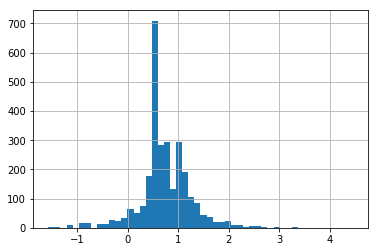

In [56]:
from scipy.stats import boxcox
transformed, att = boxcox(train['T3'])
pom = pd.Series(transformed).hist(bins=50)

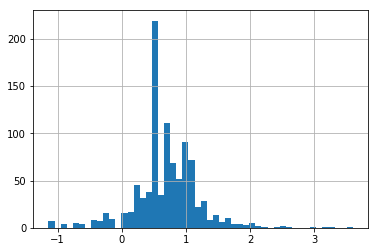

In [57]:
from scipy.stats import boxcox
transformed, att = boxcox(test['T3'])
pom = pd.Series(transformed).hist(bins=50)

Normalizacia T3

Text(0.5,1,'throughput (Z-normalization)')

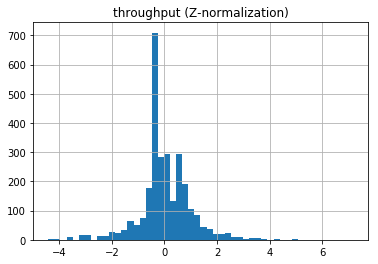

In [58]:
from scipy.stats import boxcox
transformed, att = boxcox(train['T3'])

z_transformed = normalization(transformed, np.mean(transformed), np.std(transformed))
pom = pd.Series(z_transformed).hist(bins=50)
pom.set_title('throughput (Z-normalization)')

Text(0.5,1,'throughput (Z-normalization)')

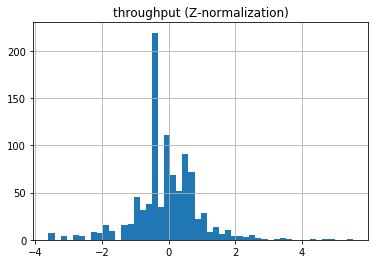

In [59]:
T3_mean = np.mean(transformed)
T3_std = np.std(transformed)

from scipy.stats import boxcox
transformed, att = boxcox(test['T3'])

z_transformed = normalization(transformed, T3_mean, T3_std)
pom = pd.Series(z_transformed).hist(bins=50)
pom.set_title('throughput (Z-normalization)')

### Korelacie na trenovacich datach

In [60]:
train['class'] = train['class'].map(lambda x: 1 if(x=='sick.') else 0)
test['class'] = test['class'].map(lambda x: 1 if(x=='sick.') else 0)

train['fnlwgt']  = train['fnlwgt'].map(lambda x: float(x))
test['fnlwgt']  = test['fnlwgt'].map(lambda x: float(x))

In [61]:
df = train[['TT4', 'T4U', 'FTI', 'T3', 'TSH','fnlwgt', 'class']]
df_class = train['class']

In [62]:
df.corr()
pd.set_option('display.max_rows', 2800)
ex = train.isin(['?', 'nan', 'Nan', '??'])
train.isnull().any().any()

True

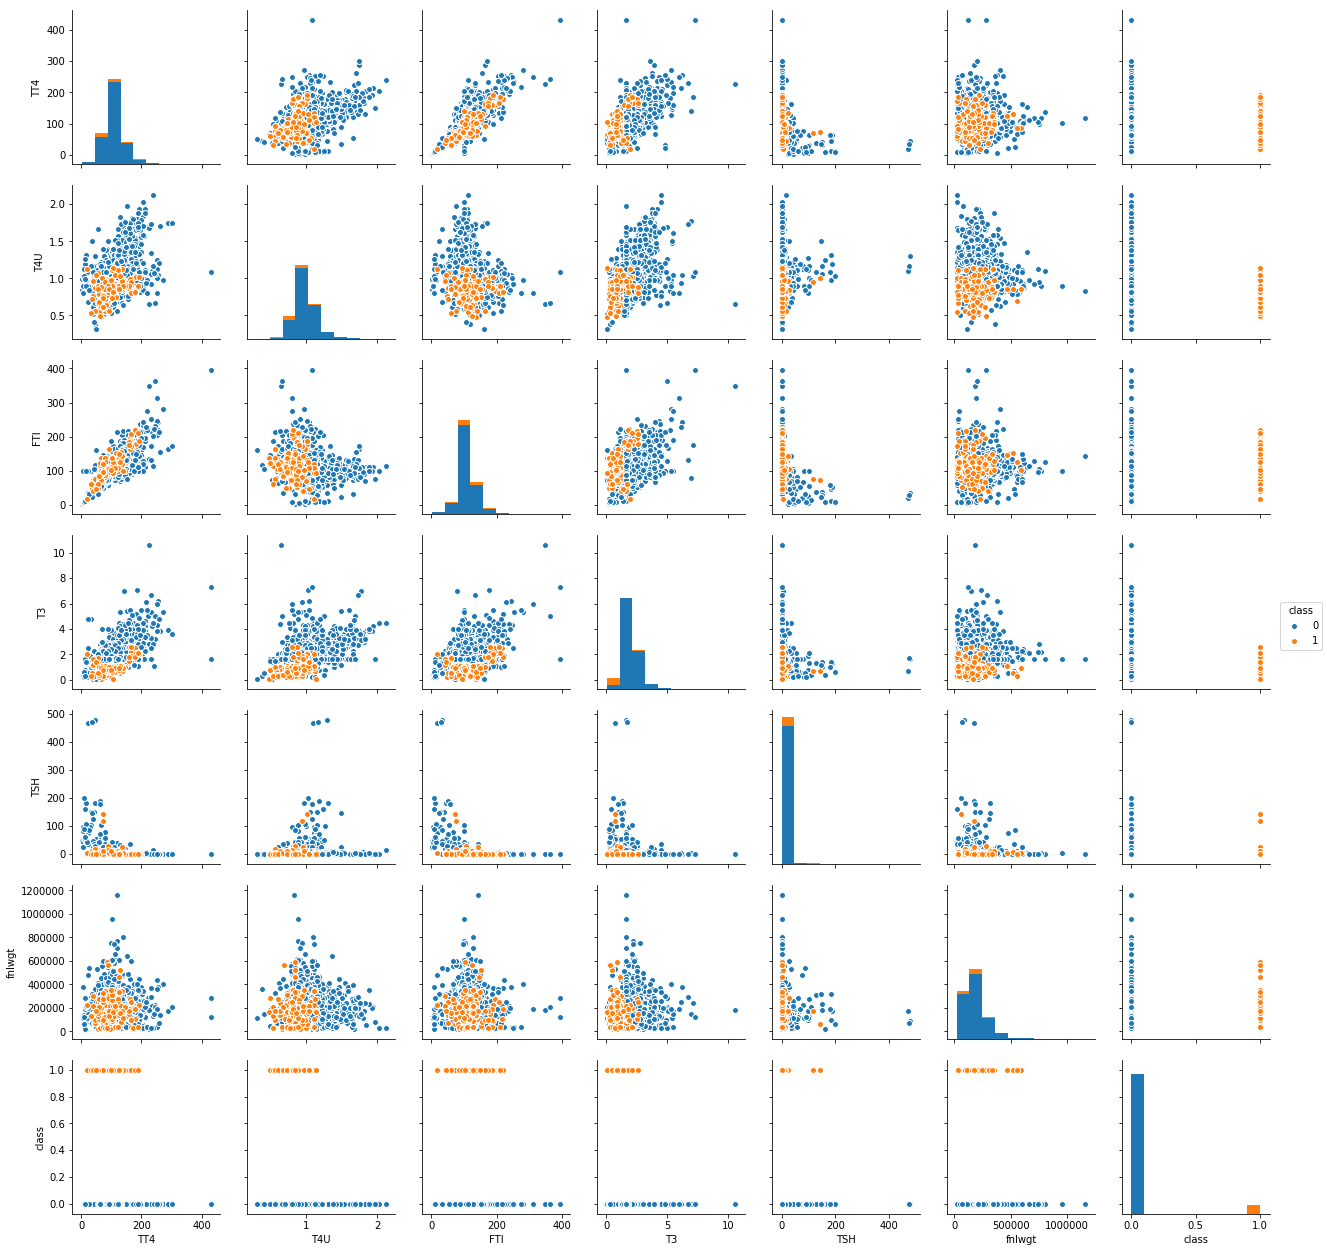

In [63]:
sb.pairplot(df, hue="class")

### Transformacia kategorickych atributov na numericke

In [64]:
train.head()

,age,sex,query on thyroxine,on antithyroid medication,thyroid surgery,I131 treatment,tumor,hypopituitary,TSH,T3 measured,T3,TT4 measured,TT4,T4U,FTI measured,FTI,referral source,class,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,date_of_birth,T4U measured,TSH measured,goitre,lithium,on thyroxine,pregnant,psych,query hyperthyroid,query hypothyroid,sick,class_id
1,53,M,f,f,f,f,f,f,0.3,t,1.2,t,105.0,0.91,t,115.0,svhc,0,Private,90021.0,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,0,0,40,?,1965-01-22,t,t,f,f,f,f,f,f,f,f,232
2,73,M,f,f,f,f,f,f,2.1,t,1.9,t,118.0,0.90,t,131.0,svi,0,Private,97411.0,7th-8th,4,Never-married,Machine-op-inspct,Not-in-family,Asian-Pac-Islander,0,0,45,Laos,1944-04-01,t,t,f,f,f,f,f,f,f,t,3255
3,73,F,f,f,f,f,f,f,1.6,t,2.0,t,105.0,1.17,t,89.0,svi,0,Local-gov,89491.0,Masters,14,Divorced,Exec-managerial,Not-in-family,White,0,0,40,United-States,2045-03-12,t,t,f,f,f,f,f,f,f,f,322
4,24,M,f,f,f,f,f,f,1.3,t,1.7,t,106.0,1.00,t,106.0,svhc,0,Private,279636.0,HS-grad,9,Never-married,Adm-clerical,Not-in-family,White,0,0,50,Guatemala,1993-12-26,t,t,f,f,f,f,f,f,f,f,2462
5,25,F,f,f,f,f,f,f,468.0,t,0.7,t,21.0,1.10,t,19.0,other,0,Private,172577.0,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,0,0,44,United-States,1992-08-27,t,t,f,f,f,f,f,f,f,f,3047


In [65]:
test.head()

,age,sex,query on thyroxine,on antithyroid medication,thyroid surgery,I131 treatment,tumor,hypopituitary,TSH,T3 measured,T3,TT4 measured,TT4,T4U,FTI measured,FTI,referral source,class,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,date_of_birth,T4U measured,TSH measured,goitre,lithium,on thyroxine,pregnant,psych,query hyperthyroid,query hypothyroid,sick,class_id
1,24,M,f,f,f,f,f,f,3.30,t,1.2,t,70.0,0.87,t,80.0,svi,0,Private,143766.0,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,0,0,40,United-States,1993-08-27,t,t,f,f,f,f,f,f,f,f,177
2,69,F,f,f,f,f,f,f,1.10,t,1.9,t,135.0,0.96,t,141.0,svi,0,Private,57637.0,HS-grad,9,Divorced,Other-service,Not-in-family,White,0,0,32,United-States,1949-03-07,t,t,f,f,f,f,f,f,f,f,3191
3,37,M,f,f,f,f,f,f,2.60,t,2.3,t,68.0,0.94,t,72.0,other,0,Private,244268.0,11th,7,Married-civ-spouse,Craft-repair,Husband,White,0,1672,48,United-States,1980-09-12,t,t,f,f,f,f,f,f,f,f,3013
4,46,M,f,f,f,f,f,f,0.25,t,2.0,t,112.0,1.01,t,111.0,svi,0,Private,606347.0,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,Black,0,0,40,United-States,1971-07-15,t,t,f,f,f,f,f,f,f,f,701
5,29,F,f,f,f,f,f,f,1.60,t,2.6,t,89.0,0.98,t,91.0,other,0,Self-emp-inc,342510.0,Bachelors,13,Married-civ-spouse,Farming-fishing,Wife,White,0,0,60,United-States,1988-08-17,f,t,f,f,f,f,f,f,f,f,541


In [66]:
train['sex'] = train['sex'].map(lambda x: 0 if x=='M' else 1)
test['sex'] = test['sex'].map(lambda x: 0 if x=='M' else 1)

In [67]:
train['query on thyroxine'] = train['query on thyroxine'].map(lambda x: 0 if x=='f' else 1)
test['query on thyroxine'] = test['query on thyroxine'].map(lambda x: 0 if x=='f' else 1) #true = 1, false = 0

In [68]:
train['on antithyroid medication'] = train['on antithyroid medication'].map(lambda x: 0 if x=='f' else 1)
test['on antithyroid medication'] = test['on antithyroid medication'].map(lambda x: 0 if x=='f' else 1)

In [69]:
train['thyroid surgery'] = train['thyroid surgery'].map(lambda x: 0 if x=='f' else 1)
test['thyroid surgery'] = test['thyroid surgery'].map(lambda x: 0 if x=='f' else 1)

In [70]:
train['I131 treatment'] = train['I131 treatment'].map(lambda x: 0 if x=='f' else 1)
test['I131 treatment'] = test['I131 treatment'].map(lambda x: 0 if x=='f' else 1)

In [71]:
train['tumor'] = train['tumor'].map(lambda x: 0 if x=='f' else 1)
test['tumor'] = test['tumor'].map(lambda x: 0 if x=='f' else 1)

In [72]:
train['hypopituitary'] = train['hypopituitary'].map(lambda x: 0 if x=='f' else 1)
test['hypopituitary'] = test['hypopituitary'].map(lambda x: 0 if x=='f' else 1)

In [73]:
train = train.drop('T3 measured', 1)
train = train.drop('TT4 measured', 1)
train = train.drop('FTI measured', 1)
train = train.drop('T4U measured', 1)
train = train.drop('TSH measured', 1) #nakolko chybajuce hodnoty TSH, FTI... doplname, nepotrebujeme uz mat informaciu, ci sme ich merali alebo nie

test = test.drop('T3 measured', 1)
test = test.drop('TT4 measured', 1)
test = test.drop('FTI measured', 1)
test = test.drop('T4U measured', 1)
test = test.drop('TSH measured', 1)

train = train.drop('date_of_birth', 1)
test = test.drop('date_of_birth', 1) #vek uz mame, datum narodenia nam teda netreba

In [74]:
train['goitre'] = train['goitre'].map(lambda x: 0 if x=='f' else 1)
test['goitre'] = test['goitre'].map(lambda x: 0 if x=='f' else 1)

In [75]:
train['lithium'] = train['lithium'].map(lambda x: 0 if x=='f' else 1)
test['lithium'] = test['lithium'].map(lambda x: 0 if x=='f' else 1)

In [76]:
train['on thyroxine'] = train['on thyroxine'].map(lambda x: 0 if x=='f' else 1)
test['on thyroxine'] = test['on thyroxine'].map(lambda x: 0 if x=='f' else 1)

In [77]:
train['pregnant'] = train['pregnant'].map(lambda x: 0 if x=='f' else 1)
test['pregnant'] = test['pregnant'].map(lambda x: 0 if x=='f' else 1)

In [78]:
train['psych'] = train['psych'].map(lambda x: 0 if x=='f' else 1)
test['psych'] = test['psych'].map(lambda x: 0 if x=='f' else 1)

In [79]:
train['query hyperthyroid'] = train['query hyperthyroid'].map(lambda x: 0 if x=='f' else 1)
test['query hyperthyroid'] = test['query hyperthyroid'].map(lambda x: 0 if x=='f' else 1)

In [80]:
train['query hypothyroid'] = train['query hypothyroid'].map(lambda x: 0 if x=='f' else 1)
test['query hypothyroid'] = test['query hypothyroid'].map(lambda x: 0 if x=='f' else 1)

In [81]:
train['sick'] = train['sick'].map(lambda x: 0 if x=='f' else 1)
test['sick'] = test['sick'].map(lambda x: 0 if x=='f' else 1)

In [82]:
train['class_id'] = train['class_id'].map(lambda x: map_to_float(x))
test['class_id'] = test['class_id'].map(lambda x: map_to_float(x))

In [83]:
train['hours-per-week'] = train['hours-per-week'].map(lambda x: map_to_float(x))
test['hours-per-week'] = test['hours-per-week'].map(lambda x: map_to_float(x))

In [84]:
train['capital-loss'] = train['capital-loss'].map(lambda x: map_to_float(x))
test['capital-loss'] = test['capital-loss'].map(lambda x: map_to_float(x))

In [85]:
train['capital-gain'] = train['capital-gain'].map(lambda x: map_to_float(x))
test['capital-gain'] = test['capital-gain'].map(lambda x: map_to_float(x))

In [86]:
train = train.drop('native-country', 1)
test = test.drop('native-country', 1) #drviva vacsina je z USA, takze sme sa rozhodli ze tieto stlpce nepotrebujeme

In [87]:
train = train.drop('race', 1)
test = test.drop('race', 1) #drviva vacsina je z White, takze sme sa rozhodli ze tieto stlpce nepotrebujeme

In [88]:
train = train.drop('education', 1)
test = test.drop('education', 1)

train = train.drop('education-num', 1)
test = test.drop('education-num', 1) #na zaklade predchadzajucej analyzy sme zistili, ze education nema vplyv na class

In [89]:
train = train.drop('occupation', 1)
test = test.drop('occupation', 1) #na zaklade predchadzajucej analyzy sme zistili, ze occupation nema vplyv na class

In [90]:
train = train.drop('marital-status', 1)
test = test.drop('marital-status', 1)#na zaklade predchadzajucej analyzy sme zistili, ze marital-status nema vplyv na class

In [91]:
train.head(100)

,age,sex,query on thyroxine,on antithyroid medication,thyroid surgery,I131 treatment,tumor,hypopituitary,TSH,T3,TT4,T4U,FTI,referral source,class,workclass,fnlwgt,relationship,capital-gain,capital-loss,hours-per-week,goitre,lithium,on thyroxine,pregnant,psych,query hyperthyroid,query hypothyroid,sick,class_id
1,53,0,0,0,0,0,0,0,0.300,1.200000,105.000000,0.910000,115.000000,svhc,0,Private,90021.0,Husband,0.0,0.0,40.0,0,0,0,0,0,0,0,0,232.0
2,73,0,0,0,0,0,0,0,2.100,1.900000,118.000000,0.900000,131.000000,svi,0,Private,97411.0,Not-in-family,0.0,0.0,45.0,0,0,0,0,0,0,0,1,3255.0
3,73,1,0,0,0,0,0,0,1.600,2.000000,105.000000,1.170000,89.000000,svi,0,Local-gov,89491.0,Not-in-family,0.0,0.0,40.0,0,0,0,0,0,0,0,0,322.0
4,24,0,0,0,0,0,0,0,1.300,1.700000,106.000000,1.000000,106.000000,svhc,0,Private,279636.0,Not-in-family,0.0,0.0,50.0,0,0,0,0,0,0,0,0,2462.0
5,25,1,0,0,0,0,0,0,468.000,0.700000,21.000000,1.100000,19.000000,other,0,Private,172577.0,Not-in-family,0.0,0.0,44.0,0,0,0,0,0,0,0,0,3047.0
6,60,1,0,0,0,0,0,0,1.100,1.601929,90.000000,1.070000,84.000000,other,0,Self-emp-not-inc,175964.0,Not-in-family,0.0,0.0,40.0,0,0,0,0,0,0,0,0,3198.0
7,32,0,0,0,0,0,0,0,3.000,1.601929,134.000000,1.290000,104.000000,other,0,Private,61777.0,Husband,0.0,0.0,30.0,0,0,1,0,0,1,1,0,1438.0
8,71,1,0,0,0,1,0,0,2.400,1.900000,133.000000,1.090000,123.000000,other,0,Private,195638.0,Not-in-family,0.0,0.0,40.0,0,0,0,0,0,0,0,0,3737.0
9,27,1,0,0,0,0,0,0,0.020,5.300000,272.000000,0.970000,281.000000,other,0,Private,404085.0,Wife,0.0,0.0,40.0,0,0,0,0,0,0,0,0,3351.0
10,64,0,0,0,0,0,0,0,3.500,1.800000,72.000000,0.860000,84.000000,svi,0,Private,108023.0,Husband,0.0,0.0,40.0,0,0,1,0,0,0,0,0,1292.0


In [92]:
train[train.isnull().any(axis=1)]

,age,sex,query on thyroxine,on antithyroid medication,thyroid surgery,I131 treatment,tumor,hypopituitary,TSH,T3,TT4,T4U,FTI,referral source,class,workclass,fnlwgt,relationship,capital-gain,capital-loss,hours-per-week,goitre,lithium,on thyroxine,pregnant,psych,query hyperthyroid,query hypothyroid,sick,class_id


In [93]:
test[test.isnull().any(axis=1)]

,age,sex,query on thyroxine,on antithyroid medication,thyroid surgery,I131 treatment,tumor,hypopituitary,TSH,T3,TT4,T4U,FTI,referral source,class,workclass,fnlwgt,relationship,capital-gain,capital-loss,hours-per-week,goitre,lithium,on thyroxine,pregnant,psych,query hyperthyroid,query hypothyroid,sick,class_id


Zistili sme, ze uz nemame chybajuce data, potrebujeme teda zvysne katerogicke hodnoty zmenit na numericke

Transformacia hodnot pre referral source

In [94]:
import category_encoders as ce

# encoder = ce.OrdinalEncoder()
# encoder = ce.BinaryEncoder()
# encoder = ce.PolynomialEncoder() 
# encoder = ce.HashingEncoder()

# encoder = ce.HelmertEncoder()
encoder = ce.OneHotEncoder() # tento je aj v sklearn.preprocessing.OneHotEncoder, tu su ale vsetky a maju rovnaky predpis
# encoder = ce.BackwardDifferenceEncoder()
# encoder = ce.SumEncoder()

In [95]:
encoder.fit(train, train['fnlwgt'])
train_categorical = encoder.transform(train) #ani mi to nezbehne, tak dlho to trva
train_categorical.head()

,referral source_0,referral source_1,referral source_2,referral source_3,referral source_4,referral source_-1,workclass_0,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_-1,relationship_0,relationship_1,relationship_2,relationship_3,relationship_4,relationship_5,relationship_-1,age,sex,query on thyroxine,on antithyroid medication,thyroid surgery,I131 treatment,tumor,hypopituitary,TSH,T3,TT4,T4U,FTI,class,fnlwgt,capital-gain,capital-loss,hours-per-week,goitre,lithium,on thyroxine,pregnant,psych,query hyperthyroid,query hypothyroid,sick,class_id
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,53,0,0,0,0,0,0,0,0.3,1.2,105.0,0.91,115.0,0,90021.0,0.0,0.0,40.0,0,0,0,0,0,0,0,0,232.0
2,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,73,0,0,0,0,0,0,0,2.1,1.9,118.0,0.90,131.0,0,97411.0,0.0,0.0,45.0,0,0,0,0,0,0,0,1,3255.0
3,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,73,1,0,0,0,0,0,0,1.6,2.0,105.0,1.17,89.0,0,89491.0,0.0,0.0,40.0,0,0,0,0,0,0,0,0,322.0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,24,0,0,0,0,0,0,0,1.3,1.7,106.0,1.00,106.0,0,279636.0,0.0,0.0,50.0,0,0,0,0,0,0,0,0,2462.0
5,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,25,1,0,0,0,0,0,0,468.0,0.7,21.0,1.10,19.0,0,172577.0,0.0,0.0,44.0,0,0,0,0,0,0,0,0,3047.0


In [96]:
encoder.fit(test, test['fnlwgt'])
test_categorical = encoder.transform(test) #ani mi to nezbehne, tak dlho to trva
test_categorical.head()

,referral source_0,referral source_1,referral source_2,referral source_3,referral source_4,referral source_-1,workclass_0,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_-1,relationship_0,relationship_1,relationship_2,relationship_3,relationship_4,relationship_5,relationship_-1,age,sex,query on thyroxine,on antithyroid medication,thyroid surgery,I131 treatment,tumor,hypopituitary,TSH,T3,TT4,T4U,FTI,class,fnlwgt,capital-gain,capital-loss,hours-per-week,goitre,lithium,on thyroxine,pregnant,psych,query hyperthyroid,query hypothyroid,sick,class_id
1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,24,0,0,0,0,0,0,0,3.30,1.2,70.0,0.87,80.0,0,143766.0,0.0,0.0,40.0,0,0,0,0,0,0,0,0,177.0
2,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,69,1,0,0,0,0,0,0,1.10,1.9,135.0,0.96,141.0,0,57637.0,0.0,0.0,32.0,0,0,0,0,0,0,0,0,3191.0
3,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,37,0,0,0,0,0,0,0,2.60,2.3,68.0,0.94,72.0,0,244268.0,0.0,1672.0,48.0,0,0,0,0,0,0,0,0,3013.0
4,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,46,0,0,0,0,0,0,0,0.25,2.0,112.0,1.01,111.0,0,606347.0,0.0,0.0,40.0,0,0,0,0,0,0,0,0,701.0
5,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,29,1,0,0,0,0,0,0,1.60,2.6,89.0,0.98,91.0,0,342510.0,0.0,0.0,60.0,0,0,0,0,0,0,0,0,541.0


In [97]:
#vidime, ze v testovacich datach mame o jeden stlpec viac, tak v trenovacich ho odstranime
train_categorical = train_categorical.drop('workclass_7', 1)

In [98]:
train_X = train_categorical.dropna().reindex(columns=[x for x in train_categorical.columns.values if x != 'class'])
train_y = train_categorical.dropna().reindex(columns=['class'])

In [99]:
train_X[train_X.isnull().any(axis=1)]

,referral source_0,referral source_1,referral source_2,referral source_3,referral source_4,referral source_-1,workclass_0,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_-1,relationship_0,relationship_1,relationship_2,relationship_3,relationship_4,relationship_5,relationship_-1,age,sex,query on thyroxine,on antithyroid medication,thyroid surgery,I131 treatment,tumor,hypopituitary,TSH,T3,TT4,T4U,FTI,fnlwgt,capital-gain,capital-loss,hours-per-week,goitre,lithium,on thyroxine,pregnant,psych,query hyperthyroid,query hypothyroid,sick,class_id


In [100]:
train_y[train_y.isnull().any(axis=1)]

,class


In [101]:
test_X = test_categorical.dropna().reindex(columns=[x for x in test_categorical.columns.values if x != 'class'])
test_y = test_categorical.dropna().reindex(columns=['class'])

### Natrenovanie klasifikatora

In [111]:
from sklearn.ensemble import RandomForestClassifier
cls = RandomForestClassifier(max_depth=9, min_samples_leaf=3)
model = cls.fit(train_X, train_y) 
#nam netreba rozdelovat jeden dataset na trenovacie a testovacie data, kedze to uz mame rozdelene, teraz treba prist na to, co dat namiesto train_labels

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [112]:
model.score(train_X, train_y)

0.9874955341193283

In [113]:
from sklearn.metrics import accuracy_score
train_preds = model.predict(test_X)
#podla toho co mi kamarat povedal musime predikovat data bez class a 

In [114]:
model.score(test_X, test_y)

0.9475308641975309

In [115]:
importances = cls.feature_importances_
indices = np.argsort(importances)[::-1]

In [116]:
for f in range(train_X.shape[0]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

1. feature 30 (0.507529)
2. feature 33 (0.079572)
3. feature 31 (0.062375)
4. feature 1 (0.055309)
5. feature 32 (0.053410)
6. feature 29 (0.052169)
7. feature 34 (0.039597)
8. feature 2 (0.038943)
9. feature 21 (0.027580)
10. feature 46 (0.026575)
11. feature 37 (0.013191)
12. feature 22 (0.007116)
13. feature 23 (0.004526)
14. feature 10 (0.003674)
15. feature 14 (0.003433)
16. feature 0 (0.003298)
17. feature 15 (0.003219)
18. feature 17 (0.003059)
19. feature 18 (0.002600)
20. feature 11 (0.001995)
21. feature 44 (0.001695)
22. feature 7 (0.001670)
23. feature 36 (0.001295)
24. feature 9 (0.001075)
25. feature 42 (0.000995)
26. feature 12 (0.000961)
27. feature 6 (0.000903)
28. feature 43 (0.000614)
29. feature 19 (0.000505)
30. feature 35 (0.000371)
31. feature 27 (0.000292)
32. feature 40 (0.000147)
33. feature 16 (0.000129)
34. feature 8 (0.000089)
35. feature 45 (0.000088)
36. feature 41 (0.000000)
37. feature 24 (0.000000)
38. feature 25 (0.000000)
39. feature 26 (0.000000)
40

IndexError: index 47 is out of bounds for axis 0 with size 47

KNN Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(test_categorical, test_categorical) 
KNeighborsClassifier(...)
print(neigh.predict([[1.1]]))

print(neigh.predict_proba([[0.9]]))
